In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline
from IPython.display import display, display_html
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(20,20)})

In [ ]:
df = pd.read_csv('gdrive/My Drive/country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [ ]:
df.isna().sum()/len(df)

country                                0.000000
iso_code                               0.000000
date                                   0.000000
total_vaccinations                     0.379583
people_vaccinated                      0.447594
people_fully_vaccinated                0.625324
daily_vaccinations_raw                 0.477988
daily_vaccinations                     0.025487
total_vaccinations_per_hundred         0.379583
people_vaccinated_per_hundred          0.447594
people_fully_vaccinated_per_hundred    0.625324
daily_vaccinations_per_million         0.025487
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

In [ ]:
print(f"Length of the dataset is: {len(df)}")

Length of the dataset is: 7337


In [ ]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.552000e+03,4.053000e+03,2.749000e+03,3.830000e+03,7.150000e+03,4552.000000,4053.000000,2749.000000,7150.000000
mean,2.361121e+06,1.918598e+06,7.999520e+05,8.744129e+04,5.825144e+04,9.398541,7.237774,3.361342,2675.625594
std,8.421579e+06,6.249484e+06,3.230805e+06,2.693155e+05,1.992295e+05,16.995766,11.614673,7.262965,4229.243670
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.741475e+04,3.457400e+04,1.799500e+04,2.732000e+03,9.882500e+02,0.717500,0.720000,0.370000,355.000000
50%,2.536690e+05,2.334230e+05,9.966600e+04,1.365700e+04,5.952500e+03,3.465000,3.050000,1.360000,1247.000000
75%,1.195748e+06,9.467810e+05,4.625030e+05,5.718200e+04,2.680500e+04,10.080000,7.890000,3.000000,3026.750000
max,1.183138e+08,7.723006e+07,4.193463e+07,4.575496e+06,2.541597e+06,151.860000,88.790000,63.070000,54264.000000


In [ ]:
data = df.isna().sum()/len(df)
for i in range(len(data)):
    if data[i] != 0.0:
        print(data.index[i], ": ", data[i])

total_vaccinations :  0.3795829358048249
people_vaccinated :  0.44759438462586887
people_fully_vaccinated :  0.6253237017854709
daily_vaccinations_raw :  0.47798827858797877
daily_vaccinations :  0.025487256371814093
total_vaccinations_per_hundred :  0.3795829358048249
people_vaccinated_per_hundred :  0.44759438462586887
people_fully_vaccinated_per_hundred :  0.6253237017854709
daily_vaccinations_per_million :  0.025487256371814093


In [ ]:
df.isna().sum()/len(df)

country                                0.000000
iso_code                               0.000000
date                                   0.000000
total_vaccinations                     0.379583
people_vaccinated                      0.447594
people_fully_vaccinated                0.625324
daily_vaccinations_raw                 0.477988
daily_vaccinations                     0.025487
total_vaccinations_per_hundred         0.379583
people_vaccinated_per_hundred          0.447594
people_fully_vaccinated_per_hundred    0.625324
daily_vaccinations_per_million         0.025487
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

In [ ]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [ ]:
vaccines = []
for vaccine in df.vaccines:
    vaccines.extend(vaccine.split(','))
vaccines_update = {}
for i in vaccines:
    vaccines_update[i] = vaccines.count(i)
vaccines_update

{' Moderna': 90,
 ' Oxford/AstraZeneca': 1964,
 ' Pfizer/BioNTech': 3631,
 ' Sinopharm/Beijing': 654,
 ' Sinopharm/Wuhan': 164,
 ' Sinovac': 395,
 ' Sputnik V': 644,
 'Covaxin': 64,
 'EpiVacCorona': 95,
 'Johnson&Johnson': 122,
 'Moderna': 2305,
 'Oxford/AstraZeneca': 2447,
 'Pfizer/BioNTech': 1560,
 'Sinopharm/Beijing': 261,
 'Sinovac': 207,
 'Sputnik V': 276}

In [ ]:
data = df.groupby('country')['vaccines'].unique()
data_df = pd.DataFrame(data)

In [ ]:
data_df.style

,vaccines
country,
Afghanistan,['Oxford/AstraZeneca']
Albania,['Pfizer/BioNTech']
Algeria,['Sputnik V']
Andorra,['Pfizer/BioNTech']
Angola,['Oxford/AstraZeneca']
Anguilla,['Oxford/AstraZeneca']
Antigua and Barbuda,['Oxford/AstraZeneca']
Argentina,"['Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V']"
Australia,"['Oxford/AstraZeneca, Pfizer/BioNTech']"


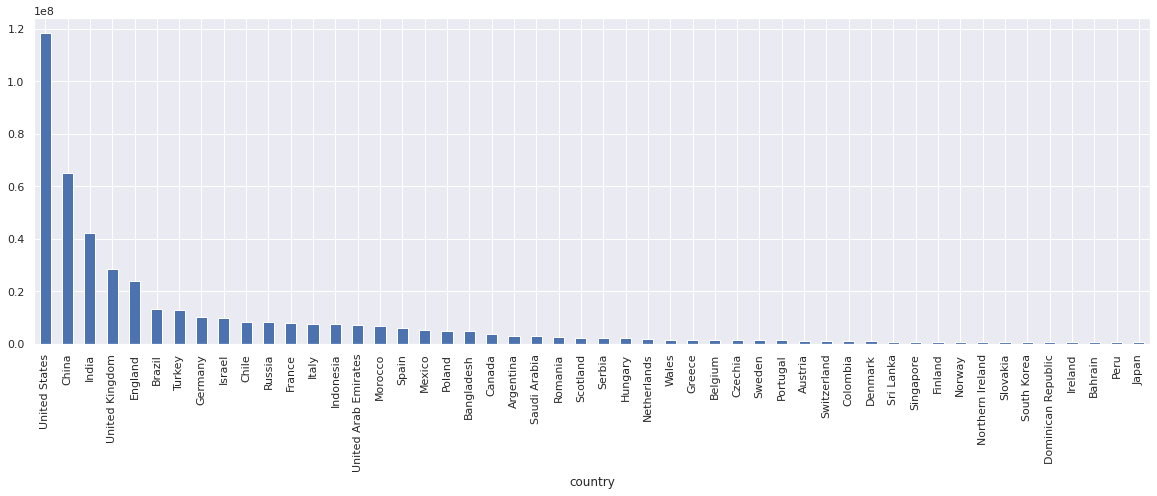

In [ ]:
plt.figure(figsize=(20, 6))
df.groupby('country')['total_vaccinations'].max().sort_values(ascending=False)[:50].plot(kind='bar');

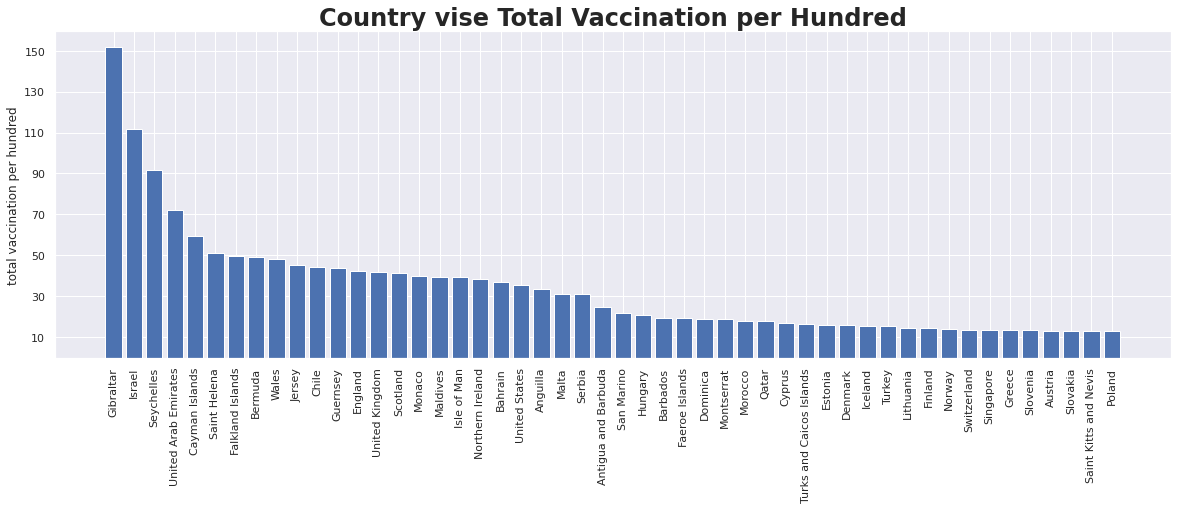

In [ ]:
plt.figure(figsize=(20, 6))
data = df.groupby('country')['total_vaccinations_per_hundred'].max().sort_values(ascending=False)[:50]
plt.bar(data.index, data);
plt.xticks(rotation='90')
plt.yticks(np.arange(10.0, 160.0, step=20.0))
plt.title('Country vise Total Vaccination per Hundred', fontsize=24, fontweight='bold')
plt.ylabel('total vaccination per hundred');

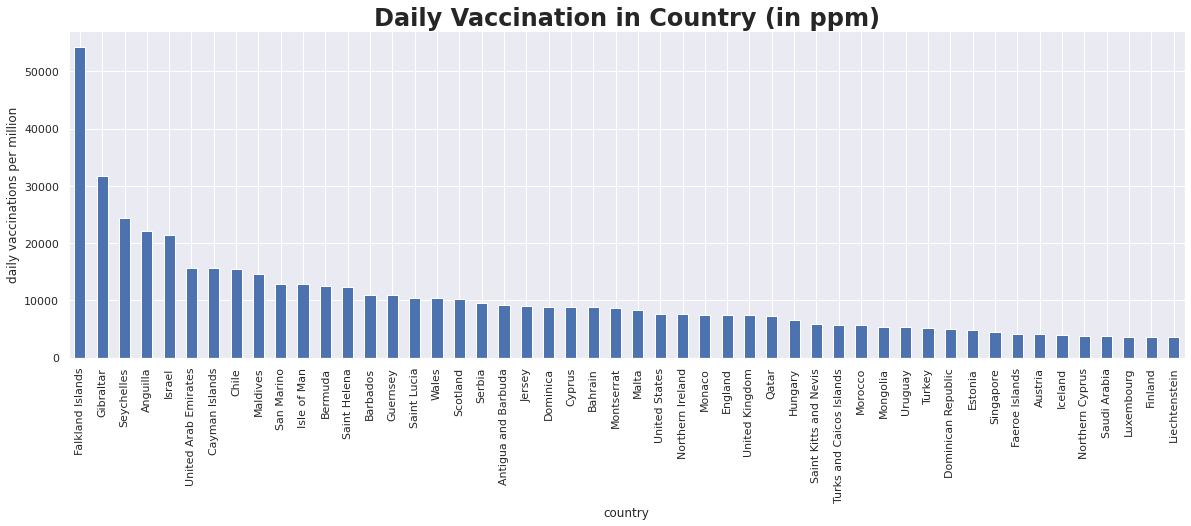

In [ ]:
plt.figure(figsize=(20, 6))
df.groupby('country')['daily_vaccinations_per_million'].max().sort_values(ascending=False)[:50].plot(kind='bar')
plt.ylabel('daily vaccinations per million')
plt.title('Daily Vaccination in Country (in ppm)', fontsize=24, fontweight='bold');

In [ ]:
date_month = [date.split('-')[1] for date in df.date]
df['date_month'] = date_month

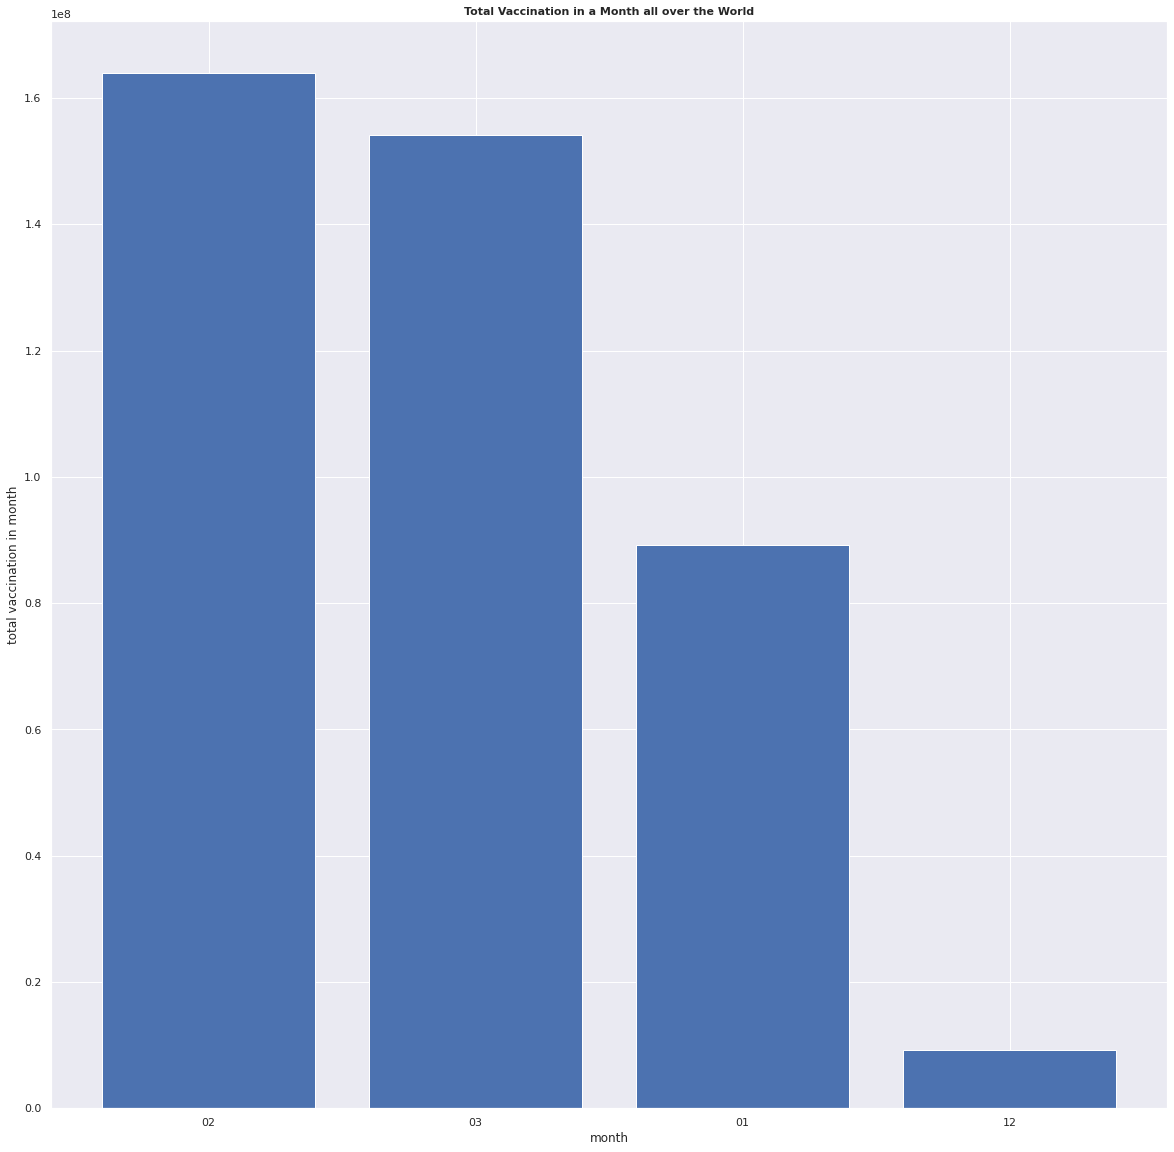

In [ ]:
data = df.groupby('date_month')['daily_vaccinations'].sum().sort_values(ascending=False)
plt.bar(data.index, data);
plt.xlabel('month');
plt.ylabel('total vaccination in month')
plt.title('Total Vaccination in a Month all over the World', fontsize=11, fontweight='bold');

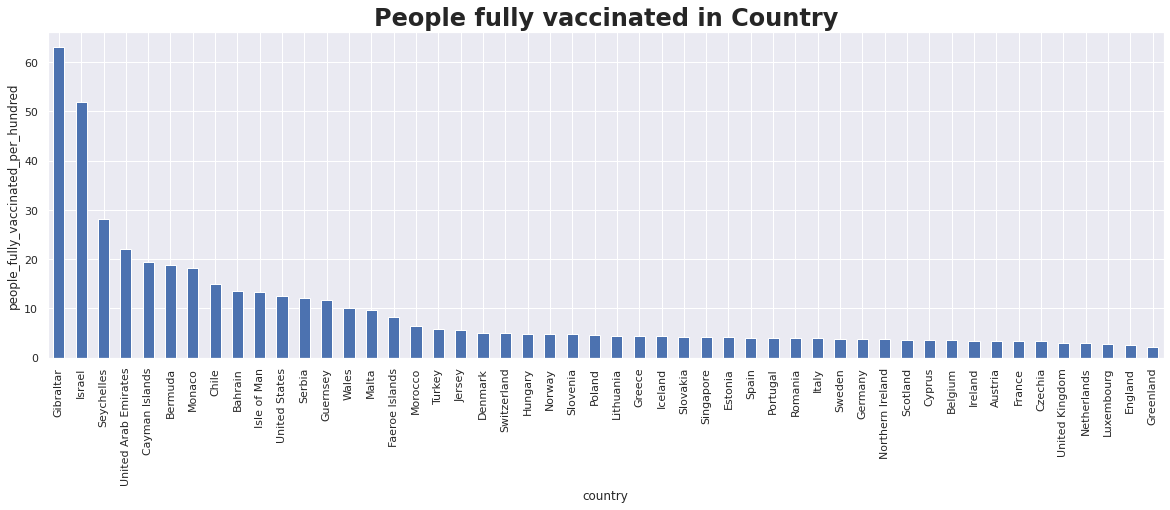

In [ ]:
plt.figure(figsize=(20, 6))
df.groupby('country')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending=False)[:50].plot(kind='bar')
plt.ylabel('people_fully_vaccinated_per_hundred')
plt.title('People fully vaccinated in Country', fontsize=24, fontweight='bold');

In [ ]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,date_month
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,02
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,02
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,02
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,02
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,02


In [ ]:
df.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     2785
people_vaccinated                      3284
people_fully_vaccinated                4588
daily_vaccinations_raw                 3507
daily_vaccinations                      187
total_vaccinations_per_hundred         2785
people_vaccinated_per_hundred          3284
people_fully_vaccinated_per_hundred    4588
daily_vaccinations_per_million          187
vaccines                                  0
source_name                               0
source_website                            0
date_month                                0
dtype: int64